In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# plt.rcParams['figure.figsize'] = (10*2,6.180*2)    #golden ratio

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/mar_2018/05_week/unfold/28_Mar_163824.feather")

In [27]:
69.7*0.35

24.395

In [29]:
1/69.7*2

0.028694404591104734

In [9]:
data.columnsumns

Index(['Steps', 'Qw', 'Energy', 'Run', 'DisReal', 'z_average', 'abs_z_average',
       'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6', 'Distance', 'AMH-Go',
       'Membrane', 'Rg', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6', 'rg_all',
       'Lipid', 'Lipid1', 'Lipid2', 'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6',
       'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10', 'Lipid11', 'Lipid12',
       'Lipid13', 'Lipid14', 'Lipid15', 'TotalE', 'Folder'],
      dtype='object')

## 0.35 force unit is about the place where it unfold.

### the Distance increases as force increases. From around 34 to 50

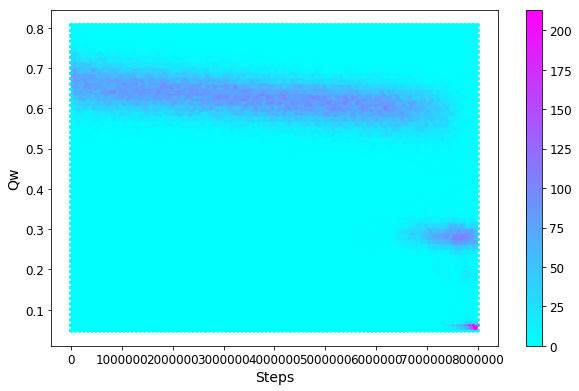

In [22]:
data.query("Steps < 0.8e7").plot.hexbin("Steps", "Qw", cmap="cool", sharex=False)

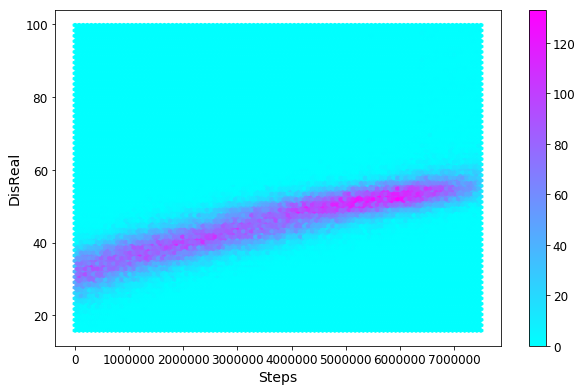

In [17]:
data.query("Steps < 0.75e7").query("DisReal < 100").plot.hexbin("Steps", "DisReal", cmap="cool", sharex=False)

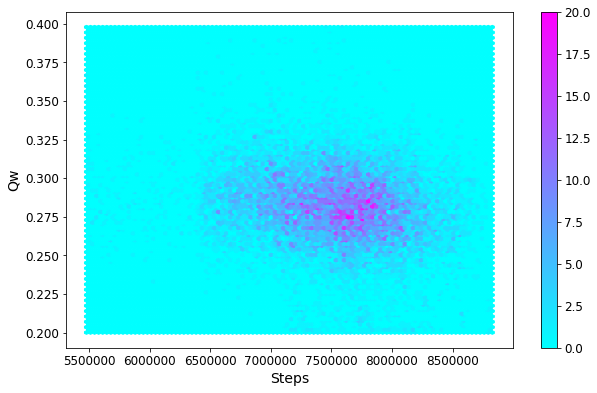

In [25]:
data.query("Qw < 0.4 and Qw > 0.2").plot.hexbin("Steps", "Qw", cmap="cool", sharex=False)

In [26]:
data.query("Qw < 0.4 and Qw > 0.2").mean()

Steps            7.515164e+06
Qw               2.815010e-01
Energy          -7.972593e+02
Run                       inf
DisReal          1.660540e+02
z_average       -9.232891e+00
abs_z_average    1.185993e+01
z_h1            -1.933514e+01
z_h2            -1.036519e+01
z_h3            -4.331215e+00
z_h4            -1.065632e+01
z_h5            -4.844121e+00
z_h6            -4.834371e+00
Distance         1.657364e+02
AMH-Go          -4.097450e+02
Membrane        -3.179659e+01
Rg               1.563998e+01
rg1              1.256990e+00
rg2              5.326775e+00
rg3              1.548448e+00
rg4              2.370826e+00
rg5              1.441439e+00
rg6              3.695505e+00
rg_all           1.563998e+01
Lipid           -1.726516e+01
Lipid1           3.361988e-04
Lipid2          -1.861182e-05
Lipid3          -1.742701e-05
Lipid4          -3.912820e-06
Lipid5          -1.859926e-05
Lipid6          -4.302988e-01
Lipid7          -2.197791e+00
Lipid8          -1.599250e+00
Lipid9    